# Лабораторная работа 2

### Подготовка сред и библиотек

In [13]:
import gymnasium as gym
from stable_baselines3 import SAC, DDPG
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import numpy as np
import time 

### В данное лабораторной работе используется среда BipedalWalker

In [14]:
env = gym.make("BipedalWalker-v3" , render_mode='rgb_array')

In [15]:
observation_space = env.observation_space
action_space = env.action_space

### Напишем функцию для визуализации

In [16]:
def visualize(model, env, step_limit=1000):

    obs = env.reset()[0]

    img = []
    step_num = 0
    while True:
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, _ = env.step(action)

        img.append(env.render())
        step_num += 1

        if terminated or step_num >= step_limit:
            break

    dpi = 72
    interval = 50 # ms
    
    plt.figure(figsize=(img[0].shape[1]/dpi,img[0].shape[0]/dpi),dpi=dpi)
    patch = plt.imshow(img[0])
    plt.axis=('off')
    animate = lambda i: patch.set_data(img[i])
    ani = animation.FuncAnimation(plt.gcf(),animate,frames=len(img),interval=interval)
    return HTML(ani.to_jshtml())

## Используем DDPG 

### DDPG, sigma = 0.001

In [ ]:
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise

n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.001 * np.ones(n_actions))

model = DDPG("MlpPolicy", env, action_noise=action_noise, verbose=1)
model.learn(total_timesteps=15000, log_interval=1)
model.save("BipedalWalker_DDPG")

### DDPG, sigma = 0.01

In [18]:
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise

n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.01 * np.ones(n_actions))

model = DDPG("MlpPolicy", env, action_noise=action_noise, verbose=1)
model.learn(total_timesteps=15000, log_interval=1)
model.save("BipedalWalker")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 114      |
|    ep_rew_mean     | -97.6    |
| time/              |          |
|    episodes        | 1        |
|    fps             | 4749     |
|    time_elapsed    | 0        |
|    total_timesteps | 114      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 91.5     |
|    ep_rew_mean     | -99.6    |
| time/              |          |
|    episodes        | 2        |
|    fps             | 406      |
|    time_elapsed    | 0        |
|    total_timesteps | 183      |
| train/             |          |
|    actor_loss      | 0.284    |
|    critic_loss     | 70.9     |
|    learning_rate   | 0.001    |
|    n_updates       | 114      |
---------------------------------
---------------------------------
| rollout/           |

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 269      |
|    ep_rew_mean     | -115     |
| time/              |          |
|    episodes        | 18       |
|    fps             | 386      |
|    time_elapsed    | 12       |
|    total_timesteps | 4836     |
| train/             |          |
|    actor_loss      | -20.7    |
|    critic_loss     | 11.3     |
|    learning_rate   | 0.001    |
|    n_updates       | 3236     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 258      |
|    ep_rew_mean     | -115     |
| time/              |          |
|    episodes        | 19       |
|    fps             | 271      |
|    time_elapsed    | 18       |
|    total_timesteps | 4902     |
| train/             |          |
|    actor_loss      | -24.7    |
|    critic_loss     | 6.39     |
|    learning_rate   | 0.001    |
|    n_updates       | 4836     |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 259      |
|    ep_rew_mean     | -113     |
| time/              |          |
|    episodes        | 35       |
|    fps             | 270      |
|    time_elapsed    | 33       |
|    total_timesteps | 9069     |
| train/             |          |
|    actor_loss      | -46.2    |
|    critic_loss     | 3.84     |
|    learning_rate   | 0.001    |
|    n_updates       | 8968     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 254      |
|    ep_rew_mean     | -114     |
| time/              |          |
|    episodes        | 36       |
|    fps             | 270      |
|    time_elapsed    | 33       |
|    total_timesteps | 9155     |
| train/             |          |
|    actor_loss      | -46.5    |
|    critic_loss     | 4.33     |
|    learning_rate   | 0.001    |
|    n_updates       | 9069     |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -114     |
| time/              |          |
|    episodes        | 52       |
|    fps             | 268      |
|    time_elapsed    | 38       |
|    total_timesteps | 10424    |
| train/             |          |
|    actor_loss      | -49.2    |
|    critic_loss     | 6.53     |
|    learning_rate   | 0.001    |
|    n_updates       | 10355    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 227      |
|    ep_rew_mean     | -115     |
| time/              |          |
|    episodes        | 53       |
|    fps             | 305      |
|    time_elapsed    | 39       |
|    total_timesteps | 12024    |
| train/             |          |
|    actor_loss      | -50.3    |
|    critic_loss     | 7.42     |
|    learning_rate   | 0.001    |
|    n_updates       | 10424    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 213      |
|    ep_rew_mean     | -114     |
| time/              |          |
|    episodes        | 69       |
|    fps             | 266      |
|    time_elapsed    | 55       |
|    total_timesteps | 14719    |
| train/             |          |
|    actor_loss      | -62.7    |
|    critic_loss     | 2.99     |
|    learning_rate   | 0.001    |
|    n_updates       | 14573    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 212      |
|    ep_rew_mean     | -114     |
| time/              |          |
|    episodes        | 70       |
|    fps             | 265      |
|    time_elapsed    | 55       |
|    total_timesteps | 14873    |
| train/             |          |
|    actor_loss      | -61.4    |
|    critic_loss     | 2.9      |
|    learning_rate   | 0.001    |
|    n_updates       | 14719    |
--------------

### DDPG, sigma = 0.1

In [19]:
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise

n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

model = DDPG("MlpPolicy", env, action_noise=action_noise, verbose=1)
model.learn(total_timesteps=15000, log_interval=1)
model.save("BipedalWalker")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 73       |
|    ep_rew_mean     | -106     |
| time/              |          |
|    episodes        | 1        |
|    fps             | 4252     |
|    time_elapsed    | 0        |
|    total_timesteps | 73       |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 71.5     |
|    ep_rew_mean     | -111     |
| time/              |          |
|    episodes        | 2        |
|    fps             | 3275     |
|    time_elapsed    | 0        |
|    total_timesteps | 143      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 581      |
|    ep_rew_mean     | -131     |
| time/              |          |
|    episodes        | 3        |
|    fps             |

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 583      |
|    ep_rew_mean     | -128     |
| time/              |          |
|    episodes        | 18       |
|    fps             | 268      |
|    time_elapsed    | 39       |
|    total_timesteps | 10495    |
| train/             |          |
|    actor_loss      | -14.5    |
|    critic_loss     | 4.1      |
|    learning_rate   | 0.001    |
|    n_updates       | 10377    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 637      |
|    ep_rew_mean     | -131     |
| time/              |          |
|    episodes        | 19       |
|    fps             | 305      |
|    time_elapsed    | 39       |
|    total_timesteps | 12095    |
| train/             |          |
|    actor_loss      | -13      |
|    critic_loss     | 20       |
|    learning_rate   | 0.001    |
|    n_updates       | 10422    |
--------------

## Использование SAC

### Learning rate = 0.001

In [20]:
import gymnasium as gym
model = SAC('MlpPolicy', env, learning_rate=0.001, verbose=1)
model.learn(total_timesteps=15000, log_interval=1)
model.save("BipedalWalker-v3")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.6e+03  |
|    ep_rew_mean     | -91.6    |
| time/              |          |
|    episodes        | 1        |
|    fps             | 177      |
|    time_elapsed    | 9        |
|    total_timesteps | 1600     |
| train/             |          |
|    actor_loss      | -9.51    |
|    critic_loss     | 0.0163   |
|    ent_coef        | 0.224    |
|    ent_coef_loss   | -9.93    |
|    learning_rate   | 0.001    |
|    n_updates       | 1499     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 824      |
|    ep_rew_mean     | -101     |
| time/              |          |
|    episodes        | 2        |
|    fps             | 177      |
|    time_elapsed    | 9        |
|    total_timesteps | 1649     |
| train/             |

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 304      |
|    ep_rew_mean     | -110     |
| time/              |          |
|    episodes        | 16       |
|    fps             | 169      |
|    time_elapsed    | 28       |
|    total_timesteps | 4860     |
| train/             |          |
|    actor_loss      | -14.8    |
|    critic_loss     | 1.54     |
|    ent_coef        | 0.0284   |
|    ent_coef_loss   | 0.238    |
|    learning_rate   | 0.001    |
|    n_updates       | 4759     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 290      |
|    ep_rew_mean     | -110     |
| time/              |          |
|    episodes        | 17       |
|    fps             | 169      |
|    time_elapsed    | 29       |
|    total_timesteps | 4928     |
| train/             |          |
|    actor_loss      | -15.8    |
|    critic_loss     | 2.87     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 339      |
|    ep_rew_mean     | -113     |
| time/              |          |
|    episodes        | 31       |
|    fps             | 167      |
|    time_elapsed    | 62       |
|    total_timesteps | 10496    |
| train/             |          |
|    actor_loss      | -20.6    |
|    critic_loss     | 1.51     |
|    ent_coef        | 0.0451   |
|    ent_coef_loss   | -0.22    |
|    learning_rate   | 0.001    |
|    n_updates       | 10395    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 332      |
|    ep_rew_mean     | -113     |
| time/              |          |
|    episodes        | 32       |
|    fps             | 167      |
|    time_elapsed    | 63       |
|    total_timesteps | 10637    |
| train/             |          |
|    actor_loss      | -19.9    |
|    critic_loss     | 1.55     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 262      |
|    ep_rew_mean     | -114     |
| time/              |          |
|    episodes        | 46       |
|    fps             | 166      |
|    time_elapsed    | 72       |
|    total_timesteps | 12063    |
| train/             |          |
|    actor_loss      | -20.1    |
|    critic_loss     | 6.42     |
|    ent_coef        | 0.0417   |
|    ent_coef_loss   | -1.62    |
|    learning_rate   | 0.001    |
|    n_updates       | 11962    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 258      |
|    ep_rew_mean     | -114     |
| time/              |          |
|    episodes        | 47       |
|    fps             | 166      |
|    time_elapsed    | 72       |
|    total_timesteps | 12117    |
| train/             |          |
|    actor_loss      | -20.6    |
|    critic_loss     | 1.83     |
|    ent_coef 

### Learning rate = 0.01

In [45]:
import gymnasium as gym
model = SAC('MlpPolicy', env, learning_rate=0.01, verbose=1)
model.learn(total_timesteps=15000, log_interval=1)
model.save("BipedalWalker-v3")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 62       |
|    ep_rew_mean     | -119     |
| time/              |          |
|    episodes        | 1        |
|    fps             | 3331     |
|    time_elapsed    | 0        |
|    total_timesteps | 62       |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 472      |
|    ep_rew_mean     | -133     |
| time/              |          |
|    episodes        | 2        |
|    fps             | 168      |
|    time_elapsed    | 5        |
|    total_timesteps | 945      |
| train/             |          |
|    actor_loss      | -1.33    |
|    critic_loss     | 0.0476   |
|    ent_coef        | 0.00439  |
|    ent_coef_loss   | -13.9    |
|    learning_rate   | 0.01     |
|    n_updates       | 844      |
----------------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 129      |
|    ep_rew_mean     | -118     |
| time/              |          |
|    episodes        | 16       |
|    fps             | 157      |
|    time_elapsed    | 13       |
|    total_timesteps | 2062     |
| train/             |          |
|    actor_loss      | 0.875    |
|    critic_loss     | 1.11     |
|    ent_coef        | 0.00906  |
|    ent_coef_loss   | -6.49    |
|    learning_rate   | 0.01     |
|    n_updates       | 1961     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 157      |
|    ep_rew_mean     | -119     |
| time/              |          |
|    episodes        | 17       |
|    fps             | 155      |
|    time_elapsed    | 17       |
|    total_timesteps | 2671     |
| train/             |          |
|    actor_loss      | 0.609    |
|    critic_loss     | 0.338    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 214      |
|    ep_rew_mean     | -115     |
| time/              |          |
|    episodes        | 31       |
|    fps             | 151      |
|    time_elapsed    | 43       |
|    total_timesteps | 6632     |
| train/             |          |
|    actor_loss      | 3.12     |
|    critic_loss     | 3.19     |
|    ent_coef        | 0.00884  |
|    ent_coef_loss   | 1.67     |
|    learning_rate   | 0.01     |
|    n_updates       | 6531     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 210      |
|    ep_rew_mean     | -115     |
| time/              |          |
|    episodes        | 32       |
|    fps             | 151      |
|    time_elapsed    | 44       |
|    total_timesteps | 6711     |
| train/             |          |
|    actor_loss      | 4.82     |
|    critic_loss     | 18.6     |
|    ent_coef 

### Learning rate = 0.1

In [22]:
import gymnasium as gym
model = SAC('MlpPolicy', env, learning_rate=0.005, verbose=1)
model.learn(total_timesteps=15000, log_interval=1)
model.save("BipedalWalker-v3")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 135      |
|    ep_rew_mean     | -104     |
| time/              |          |
|    episodes        | 1        |
|    fps             | 569      |
|    time_elapsed    | 0        |
|    total_timesteps | 135      |
| train/             |          |
|    actor_loss      | -4.8     |
|    critic_loss     | 0.108    |
|    ent_coef        | 0.848    |
|    ent_coef_loss   | -1.11    |
|    learning_rate   | 0.005    |
|    n_updates       | 34       |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 106      |
|    ep_rew_mean     | -102     |
| time/              |          |
|    episodes        | 2        |
|    fps             | 294      |
|    time_elapsed    | 0        |
|    total_timesteps | 212      |
| train/             |

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 277      |
|    ep_rew_mean     | -109     |
| time/              |          |
|    episodes        | 16       |
|    fps             | 163      |
|    time_elapsed    | 27       |
|    total_timesteps | 4431     |
| train/             |          |
|    actor_loss      | -7.23    |
|    critic_loss     | 0.826    |
|    ent_coef        | 0.0242   |
|    ent_coef_loss   | 0.567    |
|    learning_rate   | 0.005    |
|    n_updates       | 4330     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 264      |
|    ep_rew_mean     | -109     |
| time/              |          |
|    episodes        | 17       |
|    fps             | 162      |
|    time_elapsed    | 27       |
|    total_timesteps | 4495     |
| train/             |          |
|    actor_loss      | -7.36    |
|    critic_loss     | 0.741    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 184      |
|    ep_rew_mean     | -106     |
| time/              |          |
|    episodes        | 31       |
|    fps             | 160      |
|    time_elapsed    | 35       |
|    total_timesteps | 5717     |
| train/             |          |
|    actor_loss      | -4.26    |
|    critic_loss     | 0.485    |
|    ent_coef        | 0.0171   |
|    ent_coef_loss   | 1.49     |
|    learning_rate   | 0.005    |
|    n_updates       | 5616     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 181      |
|    ep_rew_mean     | -106     |
| time/              |          |
|    episodes        | 32       |
|    fps             | 160      |
|    time_elapsed    | 36       |
|    total_timesteps | 5802     |
| train/             |          |
|    actor_loss      | -5.66    |
|    critic_loss     | 0.411    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 157      |
|    ep_rew_mean     | -105     |
| time/              |          |
|    episodes        | 46       |
|    fps             | 159      |
|    time_elapsed    | 45       |
|    total_timesteps | 7233     |
| train/             |          |
|    actor_loss      | 0.176    |
|    critic_loss     | 0.407    |
|    ent_coef        | 0.0192   |
|    ent_coef_loss   | -0.79    |
|    learning_rate   | 0.005    |
|    n_updates       | 7132     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 155      |
|    ep_rew_mean     | -105     |
| time/              |          |
|    episodes        | 47       |
|    fps             | 159      |
|    time_elapsed    | 45       |
|    total_timesteps | 7301     |
| train/             |          |
|    actor_loss      | -4.14    |
|    critic_loss     | 0.35     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 139      |
|    ep_rew_mean     | -106     |
| time/              |          |
|    episodes        | 61       |
|    fps             | 157      |
|    time_elapsed    | 53       |
|    total_timesteps | 8475     |
| train/             |          |
|    actor_loss      | 1.44     |
|    critic_loss     | 1.23     |
|    ent_coef        | 0.0275   |
|    ent_coef_loss   | -0.207   |
|    learning_rate   | 0.005    |
|    n_updates       | 8374     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 138      |
|    ep_rew_mean     | -105     |
| time/              |          |
|    episodes        | 62       |
|    fps             | 157      |
|    time_elapsed    | 54       |
|    total_timesteps | 8550     |
| train/             |          |
|    actor_loss      | -1.05    |
|    critic_loss     | 1.04     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 131      |
|    ep_rew_mean     | -107     |
| time/              |          |
|    episodes        | 76       |
|    fps             | 157      |
|    time_elapsed    | 63       |
|    total_timesteps | 9934     |
| train/             |          |
|    actor_loss      | 6.43     |
|    critic_loss     | 1.03     |
|    ent_coef        | 0.0124   |
|    ent_coef_loss   | 0.371    |
|    learning_rate   | 0.005    |
|    n_updates       | 9833     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 150      |
|    ep_rew_mean     | -107     |
| time/              |          |
|    episodes        | 77       |
|    fps             | 157      |
|    time_elapsed    | 73       |
|    total_timesteps | 11534    |
| train/             |          |
|    actor_loss      | -0.862   |
|    critic_loss     | 1.28     |
|    ent_coef 

## Исследование влияние learning_rate

In [23]:
from pyvirtualdisplay import Display

In [24]:
import gymnasium as gym
# Создание среды Pendulum-1 из Gym
env = gym.make('BipedalWalker-v3')

# Список learning rate, которые вы хотите проверить
learning_rates = [0.0001, 0.001, 0.01]
sac_reward = {0.0001:[],0.001:[],0.01:[]}

# Итерация по разным learning rates
for lr in learning_rates:
    # Создание модели SAC с заданным learning rate
    model = SAC('MlpPolicy', env, learning_rate=lr, verbose=1)

    # Обучение модели
    model.learn(total_timesteps=5000)

    # Сохранение обученной модели
    model.save(f'sac_pendulum_lr_{lr}')
    obs, info = env.reset()
    for i in range(50):
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, info = env.step(action)
        sac_reward[lr].append(reward)
        if terminated or truncated:
            obs, info = env.reset()

# Закрытие среды
env.close()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 451      |
|    ep_rew_mean     | -108     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 167      |
|    time_elapsed    | 10       |
|    total_timesteps | 1803     |
| train/             |          |
|    actor_loss      | -20.4    |
|    critic_loss     | 0.683    |
|    ent_coef        | 0.844    |
|    ent_coef_loss   | -1.14    |
|    learning_rate   | 0.0001   |
|    n_updates       | 1702     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 256      |
|    ep_rew_mean     | -105     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 166      |
|    time_elapsed    | 12       |
|    total_timesteps | 2052     |
| train/             |

In [56]:
print(sum(sac_reward[0.0001])/len(sac_reward[0.0001]))
print(sum(sac_reward[0.001])/len(sac_reward[0.001]))
print(sum(sac_reward[0.01])/len(sac_reward[0.01]))

-0.037161710267799575
0.00937058211988466
-0.04909399445235728


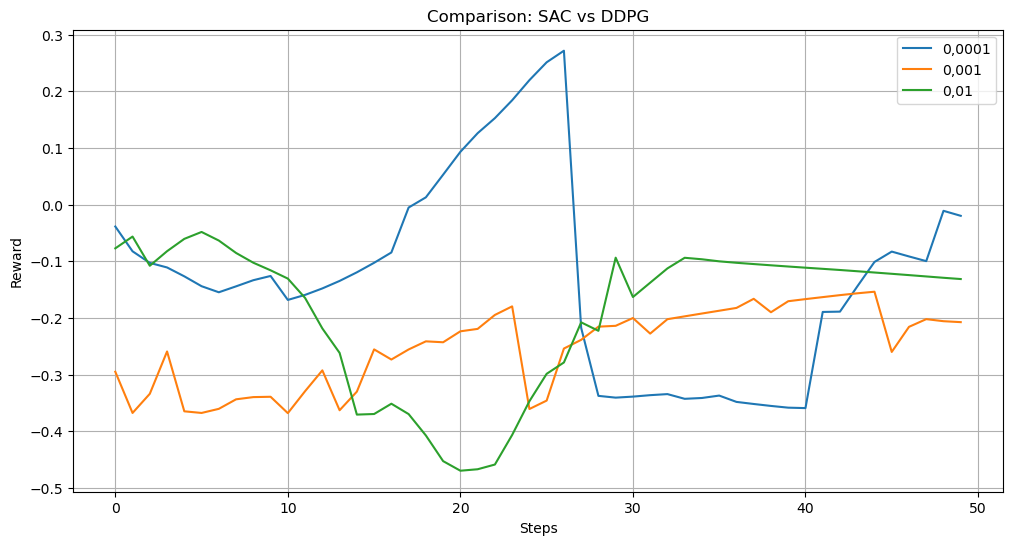

In [29]:
sac_e4,sac_e3,sac_e2 = {}, {}, {}

sac_e4["reward"] = sac_reward[0.0001]

sac_e3["reward"] = sac_reward[0.001]

sac_e2["reward"] = sac_reward[0.01]
plot_training_results([sac_e4, sac_e3, sac_e2], ["0,0001", "0,001", "0,01"], total_steps=50)